# Calculate the longwave radiation 

#### 1. Import libraries 



In [34]:
import numpy as np
import matplotlib.pyplot as plt

#### 2. We define the variables 


Ts = Sea temperature in Kelvin

Ta = Air temperature in Kelvin

e = Water vapor pressure (kPa)

k =  Cloud cover coefficient (increase with latitude)

C = Fractional cloud cover (%)

epsilon = Emittance of sea surface

sigma_SB = Stefan-Boltzmann constant

In [35]:
#Define Variables

Ts = 287 
Ta= 291 
e= 1 
k=  0.75
C = 0.5 

#### Constant variables: not to be modified ####
epsilon = 0.98 #emittance of sea surface
sigma_SB = 5.67e-8 #Stefan-Boltzmann constant


In [36]:
#Apply the formula
Qb = - epsilon * sigma_SB * (Ts)**4 * (0.39 - 0.05*(e**0.5)) * (1-k * C**2) - 4*epsilon * sigma_SB *(Ts)**3 * (Ts-Ta)


In [37]:
#print the result
print('Longwave radiation =',Qb, 'W/m2')

Longwave radiation = -83.12794241988931 W/m2


#### 3. How does the daily change in SST affect the longwave radiation?

First we create an idealized daily cycle of SST

In [38]:
#create an array with the radians for the sin function
rad = np.linspace(0,np.pi*2,24)

#The sin function simulates the daily variability of SST
Ts_serie = 3*np.sin(rad)+287 #3 degrees of amplitude and centered at 287 

Text(0.5, 0, 'Time (h)')

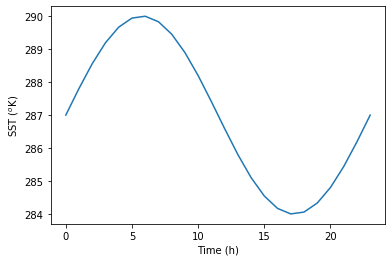

In [39]:
#Plot the daily SST
plt.plot(Ts_serie) 
plt.ylabel('SST ($^o$K)') #Define Y axis label 
plt.xlabel('Time (h)') #Define X axis label 

Now we can apply the formula to the new array of SST we just created

In [40]:
#Apply formula
Qb_serie_1 = -epsilon * sigma_SB * (Ts_serie)**4 * (0.39 - 0.05*(e**0.5)) * (1-k * C**2) + 4*epsilon * sigma_SB *(Ts_serie)**3 * (Ts_serie-Ta)

Text(0, 0.5, 'Qb (W m$^{-2}$)')

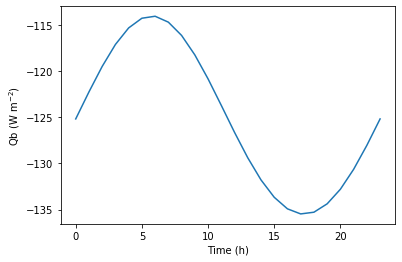

In [41]:
#plot results
plt.plot(Qb_serie_1)
plt.xlabel('Time (h)')
plt.ylabel('Qb (W m$^{-2}$)')

#### 4. What if the cloud cover changes through the day?

For this we need to create a new array containing the new varying values for cloud cover


In [42]:
#Create an array with an increasing cloud cover (C)
C_2 = np.linspace(0,1,24)

#Apply formula
Qb_serie_2 = -epsilon * sigma_SB * (Ts_serie)**4 * (0.39 - 0.05*(e**0.5)) * (1-k * C_2**2) + 4*epsilon * sigma_SB *(Ts_serie)**3 * (Ts_serie-Ta)

Text(0, 0.5, 'Qb (W m$^{-2}$)')

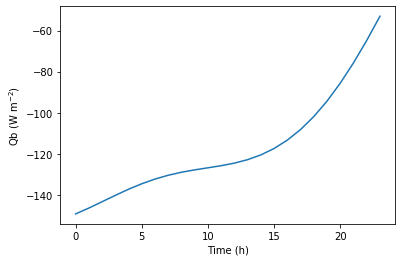

In [43]:
#plot results
plt.plot(Qb_serie_2)
plt.xlabel('Time (h)')
plt.ylabel('Qb (W m$^{-2}$)')